## CD1 IVSA FR1 Correct Rate

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# curr_dir = os.getcwd()
# parent_dir = os.path.join(curr_dir, os.pardir)
# parent_dir = os.path.join(parent_dir, 'scripts')
# sys.path.append(parent_dir)
# print(sys.path[-1])
import intervals as invs
from accuracy import graph_cumulative_acc, instant_acc, time_high_acc, graph_instant_acc, graph_avg_corr_rate
from preprocessing import read_csv_clean, calculate_accuracy_by_row
import paths
from tools import get_bhv_num

In [2]:
ctrl_ending_corr = []
ivsa_ending_corr = []
ctrl_dict_corr = {}
ivsa_dict_corr = {}
ending = []

def read_and_record(path:str, ending_corr:list, dict_corr:list):
    df = read_csv_clean(path)
    df = calculate_accuracy_by_row(df)
    value = df['Percent_Correct'].tail(1).values[0]
    # key = path
    ending_corr.append(value)
    # dict_corr[key] = value
    return df

In [3]:
for path in paths.fr1_ivsa:
    read_and_record(path, ending, None)

In [4]:
ending

[64.0,
 70.0,
 81.0,
 77.0,
 37.0,
 73.0,
 54.0,
 64.0,
 78.0,
 60.0,
 36.0,
 88.0,
 73.0,
 77.0,
 77.0]

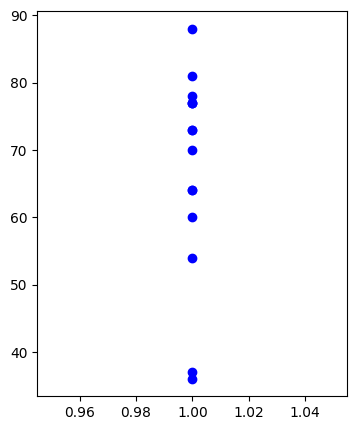

In [5]:
plt.figure(figsize=(4, 5))
plt.scatter([1]*len(ending), ending, marker='o', color='blue', zorder=2) 
plt.show()

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/54/FR1/FED000_032024_04.CSV


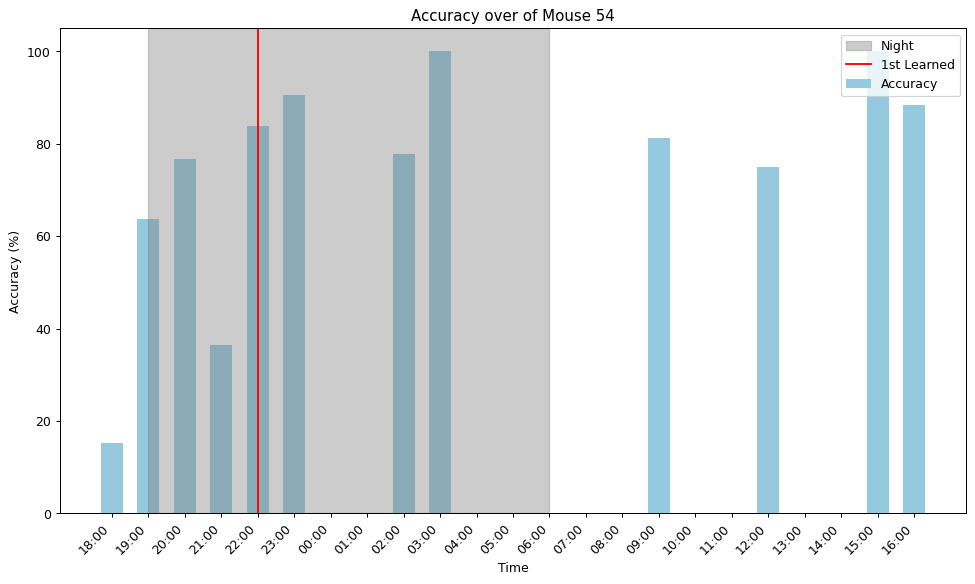

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/55/FR1/FED000_032024_05.CSV


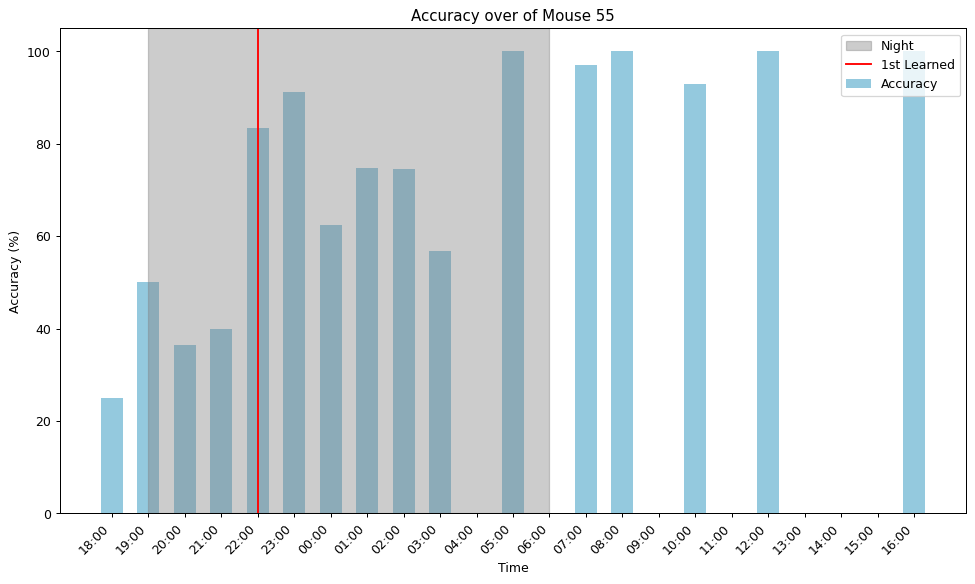

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/46/FR1/FED000_071422_00.CSV


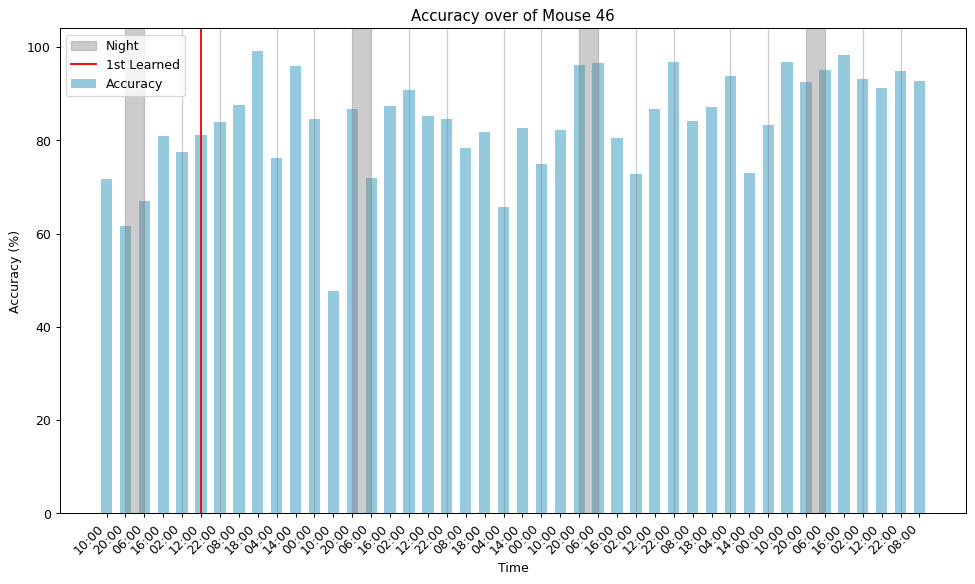

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/43 - device found off position but accessible/FR1/FED000_090623_02.CSV


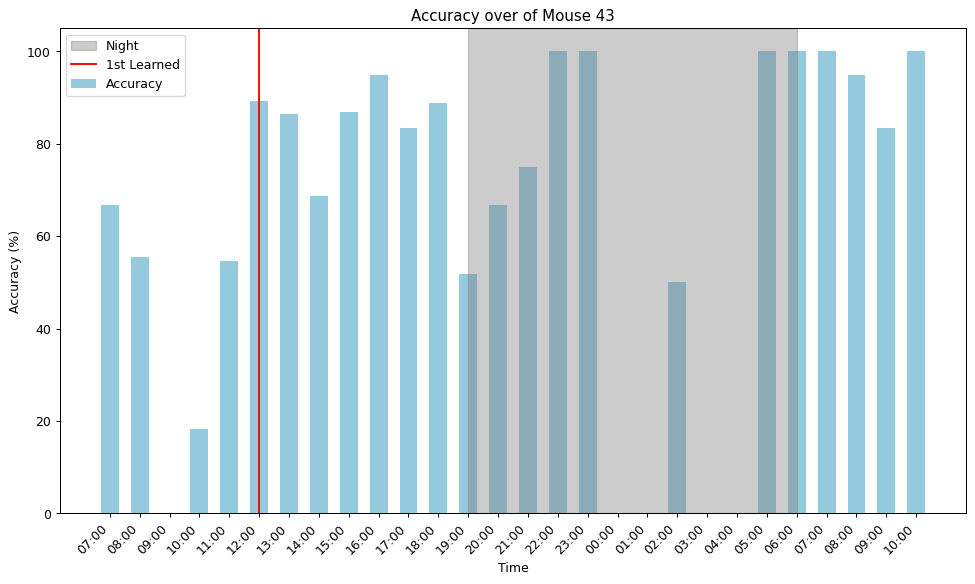

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/52 - device found against the wall/FR1/FED000_032024_13.CSV


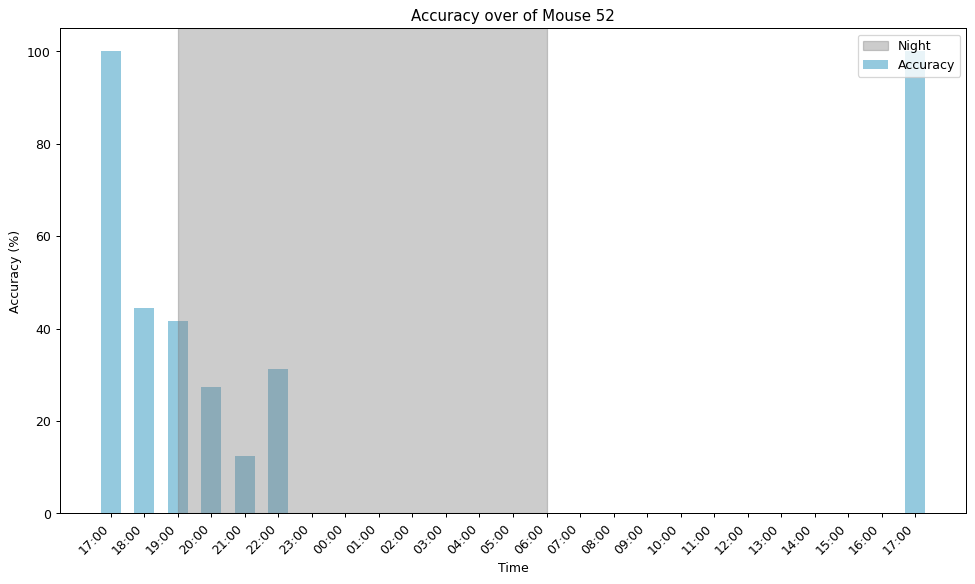

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/50/FR1/FED000_032024_03.CSV


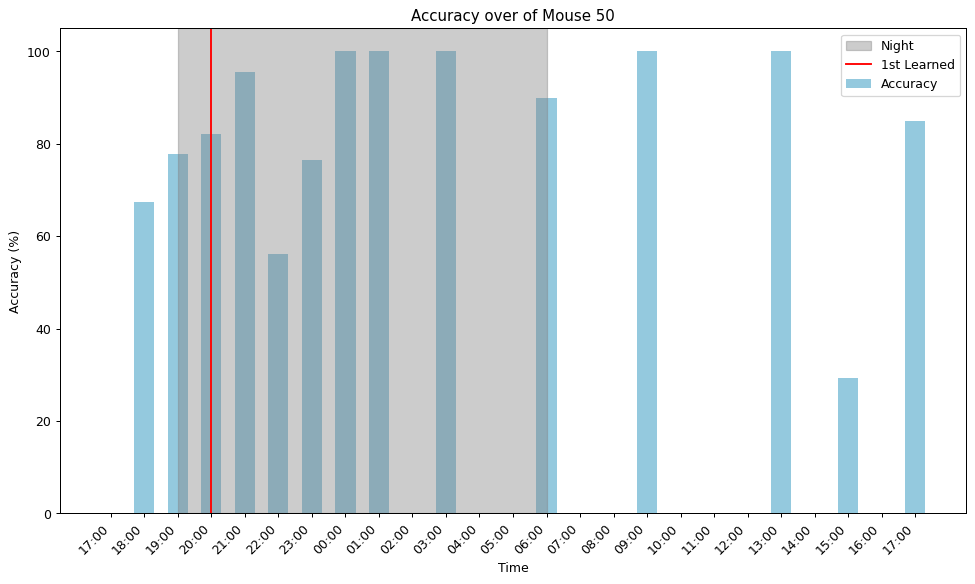

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/41/FR1/FED000_032024_02.CSV


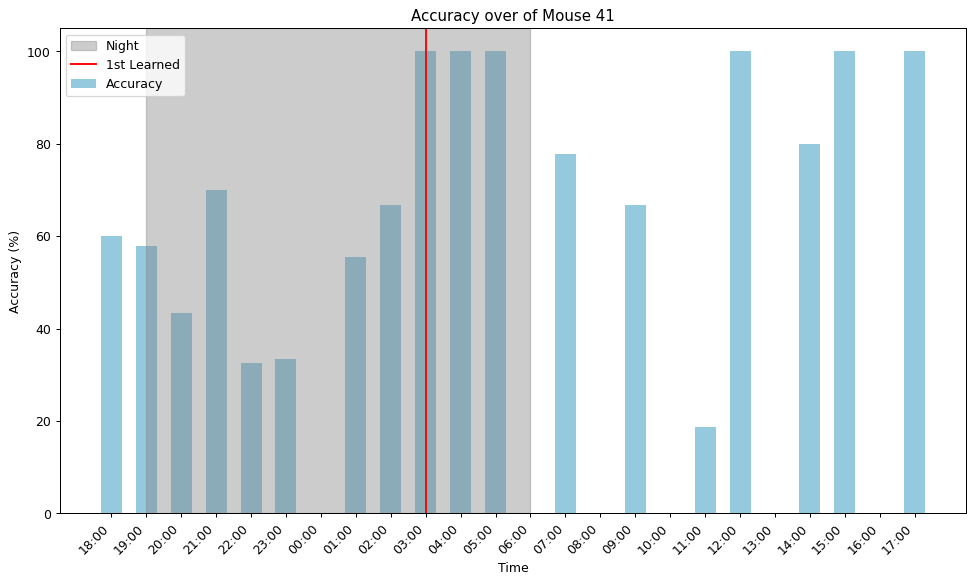

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/47/FR1/FED000_032024_04.CSV


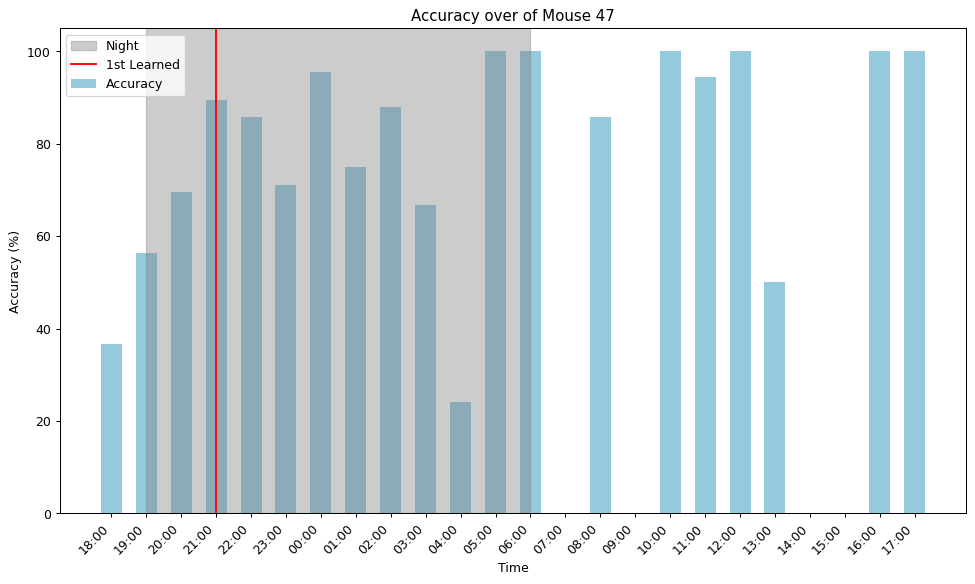

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/57/FR1/FED000_032024_02.CSV


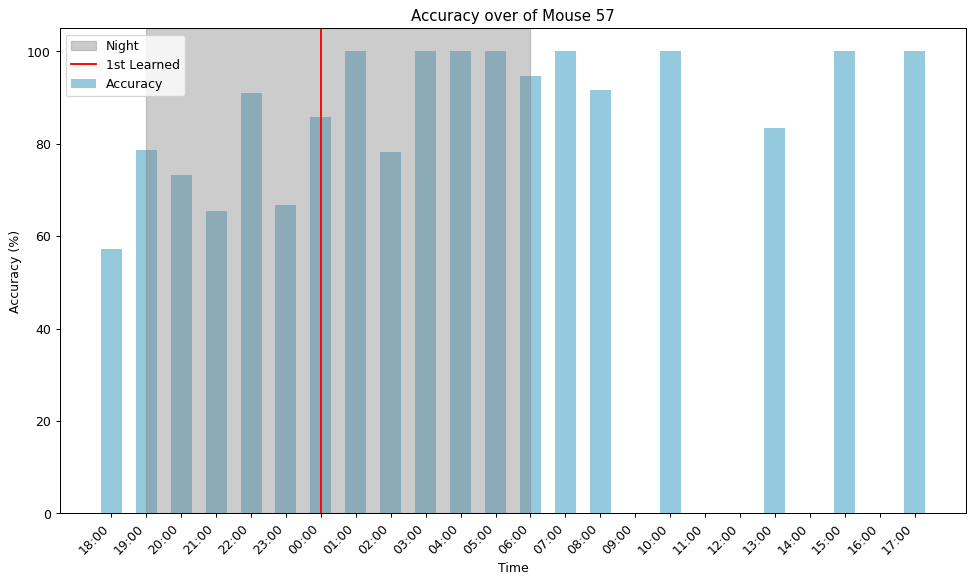

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/53/FR1/FED000_032024_06.CSV


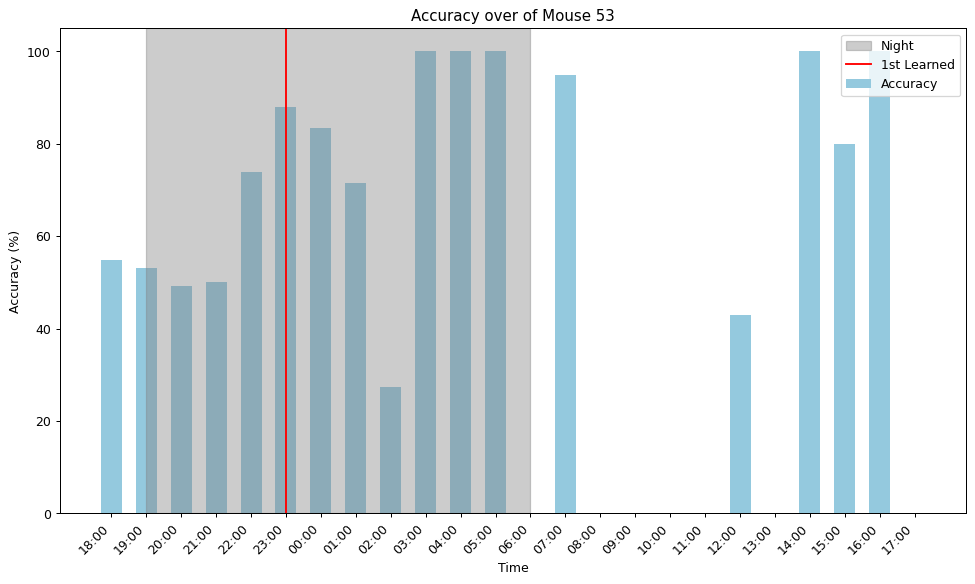

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/NA/FR1/FED000_032024_01.CSV


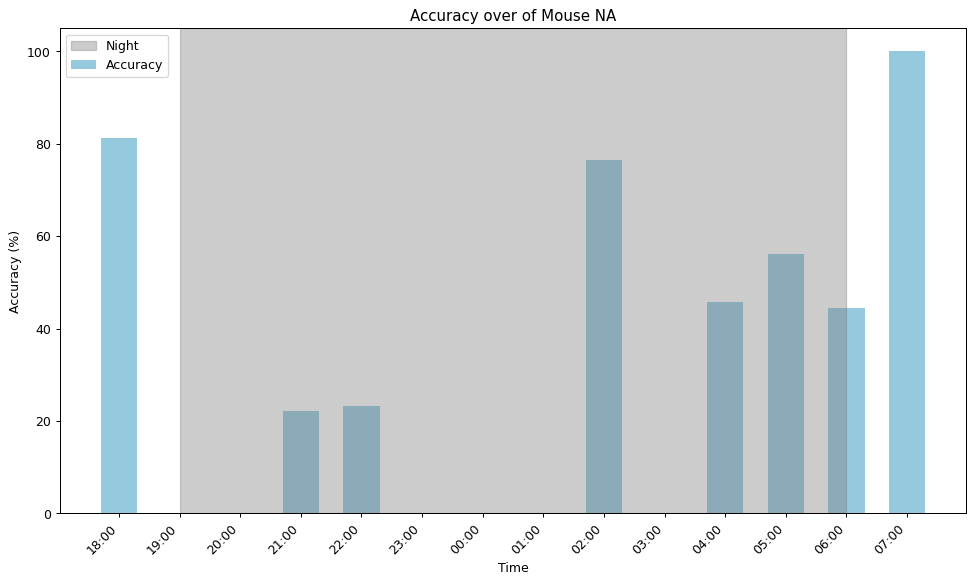

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/44/FR1/FED000_032024_01.CSV


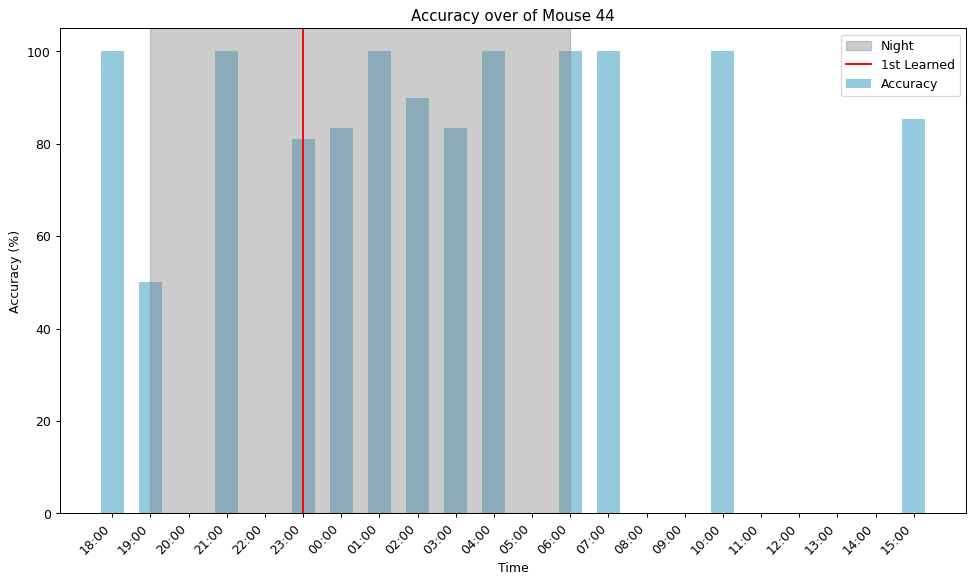

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/51/FR1/FED000_032024_05.CSV


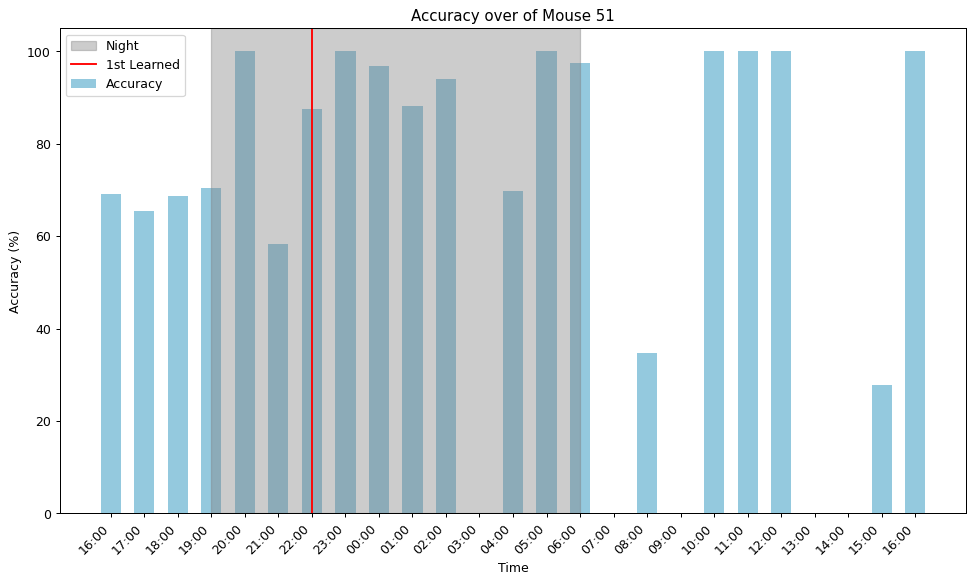

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/45/FR1/FED000_032024_08.CSV


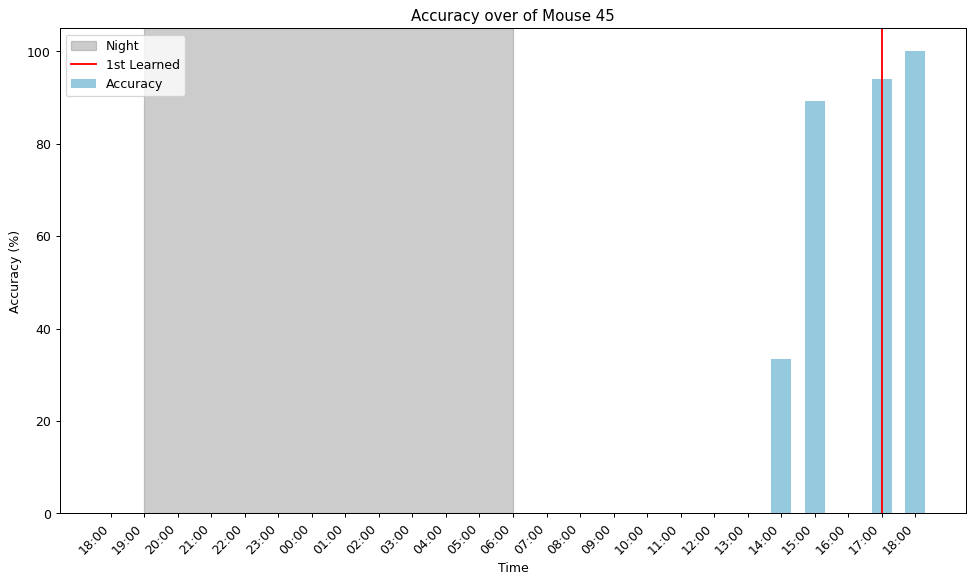

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/56/FR1/FED000_032024_01.CSV


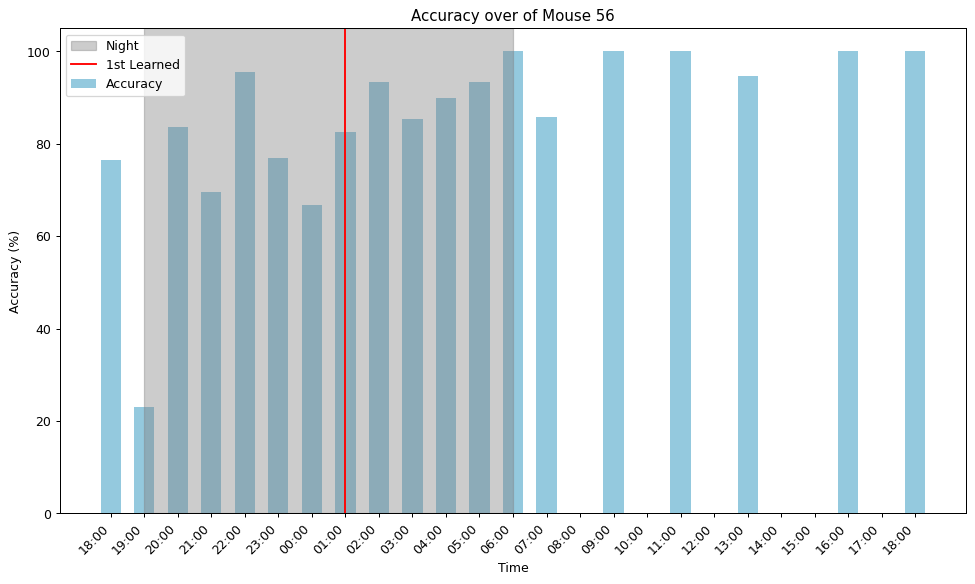

In [3]:
ctrl_times = []

for each in paths.fr1_ivsa:
    if each.split('/')[-1].startswith('.'): continue
    print(each)
    data = instant_acc(path=each, csv=True)
    stamp, hrs = time_high_acc(data)
    num = get_bhv_num(each)
    ctrl_times.append(hrs)
    graph_instant_acc(data, None, num, stamp)